# Задание 1

Загрузите данные из файла reglab1.txt. Постройте по набору данных регрессии, используя модели с различными зависимыми переменными. Выберите наиболее подходящую модель.

In [321]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [89]:
data_reglab1 = pd.read_csv('lab5_files/reglab1.txt', sep='\t')
data_reglab1.head()

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102


#### Используя метод score и без разделения на выборки

In [101]:
x_train = data_reglab1[['z', 'x']]
y_train = data_reglab1['y']

model = LinearRegression()
model.fit(x_train, y_train)

print(f'y: {model.score(x_train, y_train):.{6}f}')

y: 0.950528


In [105]:
x_train = data_reglab1[['x', 'y']]
y_train = data_reglab1['z']

model = LinearRegression()
model.fit(x_train, y_train)

print(f'z: {model.score(x_train, y_train):.{6}f}')

z: 0.968629


In [108]:
x_train = data_reglab1[['y', 'z']]
y_train = data_reglab1['x']

model = LinearRegression()
model.fit(x_train, y_train)

print(f'x: {model.score(x_train, y_train):.{6}f}')

x: 0.918668


#### Для Z

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
        data_reglab1.drop(['z'], axis=1), 
        data_reglab1['z'], 
        test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df.head()

Mean Absolute Error: 0.21272275385091804
Mean Squared Error: 0.09135739350115867
Root Mean Squared Error: 0.3022538560567237


,Actual,Predicted
115,3.722259,3.724714
199,3.928354,4.013498
136,6.422061,6.492873
148,3.717654,4.174198
0,2.836772,2.615189


#### Для Y

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
        data_reglab1.drop(['y'], axis=1), 
        data_reglab1['y'], 
        test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df.head()

Mean Absolute Error: 0.05150481671225897
Mean Squared Error: 0.004953336550361893
Root Mean Squared Error: 0.07037994423386462


,Actual,Predicted
113,0.812950,0.697977
20,0.491248,0.493424
15,0.731601,0.784167
147,0.450643,0.464671
33,0.830146,0.742116


#### Для X

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
        data_reglab1.drop(['x'], axis=1), 
        data_reglab1['x'], 
        test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df.head()

Mean Absolute Error: 0.06509091531760164
Mean Squared Error: 0.007631172939915507
Root Mean Squared Error: 0.08735658498313396


,Actual,Predicted
114,0.763216,0.808005
103,0.144058,0.083314
35,0.704861,0.696745
129,0.190205,0.229605
19,0.913778,1.007714


# Задание 2

Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого \\( k \in \{0, 1, ..., d\} \\) выбрать подмножество признаков мощности \\( k^1 \\), минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подмножество признаков для данных из файла reglab.txt. Объясните свой выбор.

In [62]:
data_reglab = pd.read_csv('lab5_files/reglab.txt', sep='\t')

data_reglab.head()

,y,x1,x2,x3,x4
0,3.469720,0.233628,0.835549,0.102965,0.457428
1,0.768448,0.117920,0.090544,0.258778,0.283951
2,2.880374,0.091520,0.797592,0.198528,0.699287
3,3.745485,0.876722,0.062935,0.615415,0.176058
4,1.853966,0.207406,0.303490,0.775967,0.667351


In [86]:
import itertools


for r in range(1, 5):
    for x_combination in itertools.combinations(['x1', 'x2', 'x3', 'x4'], r):
        x_train = data_reglab[[*x_combination]]
        y_train = data_reglab['y']
        
        model = LinearRegression()
        model.fit(x_train, y_train)
        
        print(f'{model.score(x_train, y_train):.{6}f} ', *x_combination)

0.601648  x1
0.320339  x2
0.003003  x3
0.000216  x4
0.998637  x1 x2
0.603842  x1 x3
0.601649  x1 x4
0.321480  x2 x3
0.321453  x2 x4
0.003083  x3 x4
0.999158  x1 x2 x3
0.999083  x1 x2 x4
0.603856  x1 x3 x4
0.322376  x2 x3 x4
0.999511  x1 x2 x3 x4


Из списка можно сделать вывод, что наибольший вклад дают признаки х1 и х2, а меньший вклад дают признаки х3 и х4. Оптимальным набором признаков будет x1 и х2.

# Задание 3

Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.

In [111]:
data_cygage = pd.read_csv('lab5_files/cygage.txt', sep='\t')
data_cygage

,calAge,Depth,Weight
0,0,0,1.0
1,3707,77,0.1
2,4150,90,0.1
3,5350,107,0.1
4,4500,168,0.1
5,7260,217,0.1
6,7630,282,1.0
7,8960,379,0.5
8,10030,440,0.5
9,11940,514,0.5


In [118]:
x_train = np.array(data_cygage['Depth']).reshape(-1, 1)
y_train = data_cygage['calAge']
weight = data_cygage['Weight']

model = LinearRegression()
model.fit(x_train, y_train, sample_weight=weight)

model.score(x_train, y_train)

0.942358833109952

# Задание 4

Загрузите данные из файла longley.csv. Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16). Исключите переменную Population. Разделите данные на тестовую и обучающую выборки равных размеров случайным образом.

Постройте линейную регрессию по признаку Employed.

Постройте гребневую регрессию для значений \\( \lambda = 10^{-3+0.2*i}, \quad i = 0, ..., 25 \\). 

Подсчитайте ошибку на тестовой и обучающей выборке для линейной регрессии и гребневой регрессии на данных значениях \\( \lambda \\), постройте графики. Объясните полученные результаты.


In [124]:
data_longley = pd.read_csv('lab5_files/longley.csv')
data_longley.drop('Population', axis=1, inplace=True)
data_longley

,GNP.deflator,GNP,Unemployed,Armed.Forces,Year,Employed
0,83.0,234.289,235.6,159.0,1947,60.323
1,88.5,259.426,232.5,145.6,1948,61.122
2,88.2,258.054,368.2,161.6,1949,60.171
3,89.5,284.599,335.1,165.0,1950,61.187
4,96.2,328.975,209.9,309.9,1951,63.221
5,98.1,346.999,193.2,359.4,1952,63.639
6,99.0,365.385,187.0,354.7,1953,64.989
7,100.0,363.112,357.8,335.0,1954,63.761
8,101.2,397.469,290.4,304.8,1955,66.019
9,104.6,419.180,282.2,285.7,1956,67.857


MIN  ridge score, lambda:  0.10399332123306794 0.15848931924611143


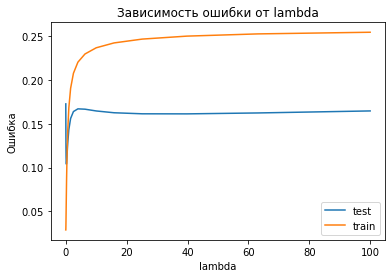

In [156]:
x_train, x_test, y_train, y_test = train_test_split(
        data_longley.drop(['Employed'], axis=1), 
        data_longley['Employed'], 
        random_state=1,
        test_size=0.5)

model = LinearRegression()
model.fit(x_train, y_train)

linear_score = model.score(x_train, y_train)

parameters = [10 ** (-3 + 0.2 * i) for i in range(26)]
ridge_score_test = []
ridge_score_train = []

for parameter in parameters:
    model = Ridge(alpha=parameter)
    
    model.fit(x_train, y_train)    
    
    predicted = model.predict(x_test)
    ridge_score_test.append(metrics.mean_squared_error(y_test, predicted))
    #ridge_score_test.append(model.score(x_test, y_test))
    
    predicted = model.predict(x_train)
    ridge_score_train.append(metrics.mean_squared_error(y_train, predicted))
    #ridge_score_train.append(model.score(x_train, y_train))

print('MIN  ridge score, lambda: ', *min(zip(ridge_score_test, parameters), key=lambda i: i[0]))
    
plt.plot(parameters, ridge_score_test, label='test')  
plt.plot(parameters, ridge_score_train, label='train')  
        
plt.title("Зависимость ошибки от lambda")
axes = plt.gca()
axes.set_ylabel('Ошибка')
axes.set_xlabel('lambda')
axes.legend()
plt.show()


# Задание 5

Загрузите данные из файла eustock.csv. Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.

In [157]:
data_eustock = pd.read_csv('lab5_files/eustock.csv')
data_eustock

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...
1855,5460.43,7721.3,3939.5,5587.6
1856,5285.78,7447.9,3846.0,5432.8
1857,5386.94,7607.5,3945.7,5462.2
1858,5355.03,7552.6,3951.7,5399.5


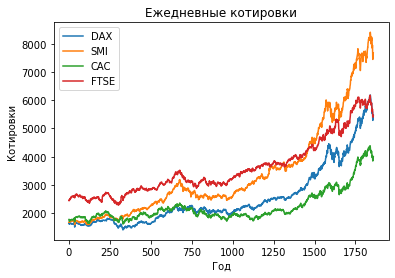

In [184]:
data_eustock.plot()  
        
plt.title("Ежедневные котировки")
axes = plt.gca()
axes.set_ylabel('Котировки')
axes.set_xlabel('Год')
axes.legend()
plt.show()

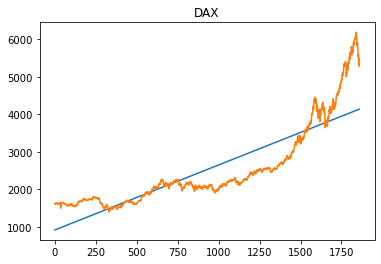

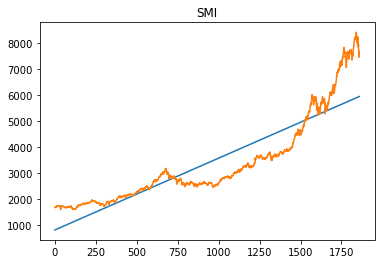

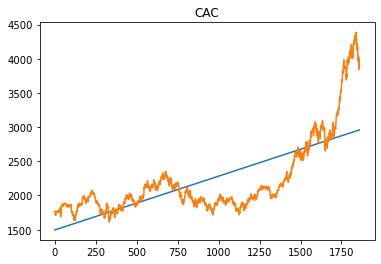

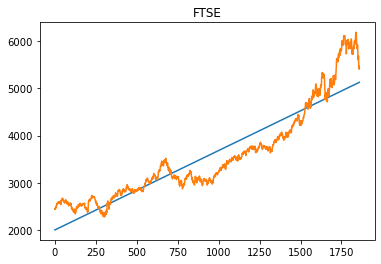

In [245]:
x_train = np.array(data_eustock.index).reshape(-1, 1)
y_train_list = [data_eustock['DAX'], data_eustock['SMI'], data_eustock['CAC'],  data_eustock['FTSE']]

for y_train in y_train_list:
    model = LinearRegression()
    model.fit(x_train, y_train)    

    predicted = model.predict(x_train)
    plt.title(y_train.name)
    plt.plot(x_train, predicted)
    plt.plot(x_train, y_train)
    plt.show()

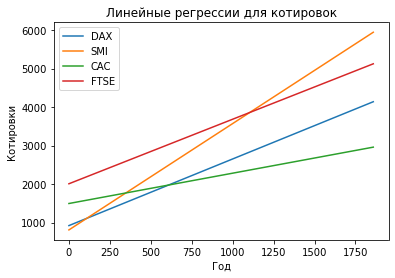

In [186]:
x_train = np.array(data_eustock.index).reshape(-1, 1)
y_train_list = [data_eustock['DAX'], data_eustock['SMI'], data_eustock['CAC'],  data_eustock['FTSE']]

for y_train in y_train_list:
    model = LinearRegression()
    model.fit(x_train, y_train)    

    predicted = model.predict(x_train)
    plt.plot(x_train, predicted, label=y_train.name)

plt.title("Линейные регрессии для котировок")
axes = plt.gca()
axes.set_ylabel('Котировки')
axes.set_xlabel('Год')
axes.legend()
plt.show()

# Задание 6

Загрузите данные из файла JohnsonJohnson.csv. Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.

In [190]:
data_johnson = pd.read_csv('lab5_files/JohnsonJohnson.csv')

new_data = data_johnson['index'].str.split(' ',expand=True)
new_data.columns=['year','quarter']

data_johnson = pd.concat([data_johnson, new_data],axis=1)
data_johnson.drop(['index'], axis=1, inplace=True)

data_johnson

,value,year,quarter
0,0.71,1960,Q1
1,0.63,1960,Q2
2,0.85,1960,Q3
3,0.44,1960,Q4
4,0.61,1961,Q1
...,...,...,...
79,9.99,1979,Q4
80,16.20,1980,Q1
81,14.67,1980,Q2
82,16.02,1980,Q3


#### Изменения прибыли

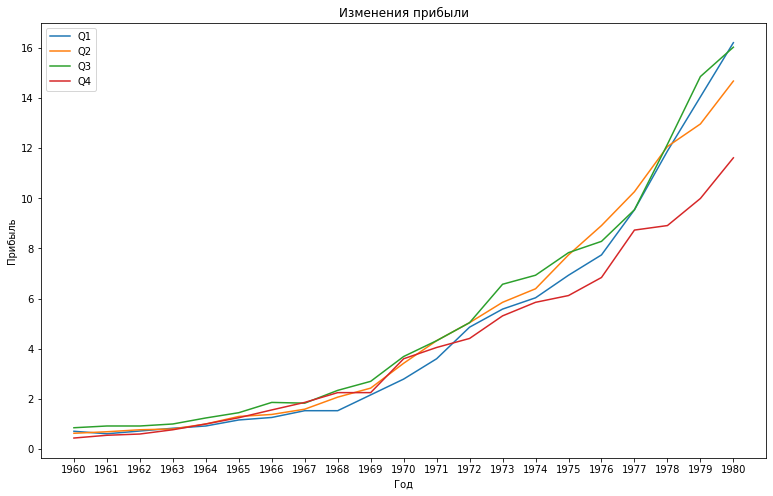

In [258]:
q1 = data_johnson[data_johnson['quarter'] == 'Q1']
q2 = data_johnson[data_johnson['quarter'] == 'Q2']
q3 = data_johnson[data_johnson['quarter'] == 'Q3']
q4 = data_johnson[data_johnson['quarter'] == 'Q4']

fig = plt.figure(figsize=(13,8))

plt.plot(q1.year, q1.value, label='Q1')
plt.plot(q2.year, q2.value, label='Q2')
plt.plot(q3.year, q3.value, label='Q3')
plt.plot(q4.year, q4.value, label='Q4')

plt.title("Изменения прибыли")
axes = plt.gca()
axes.set_ylabel('Прибыль')
axes.set_xlabel('Год')
axes.legend()
plt.show()

#### Линейные регрессии для каждого квартала отдельно и на одном графике

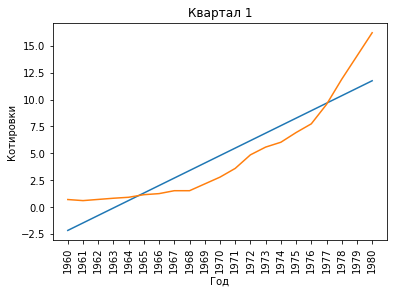

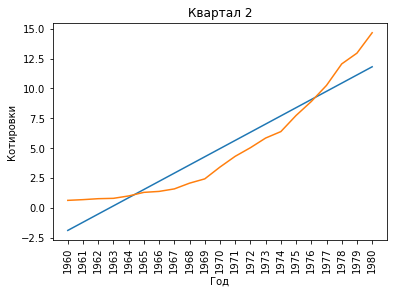

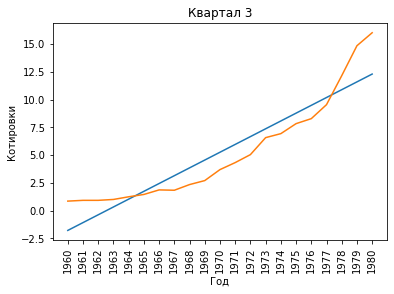

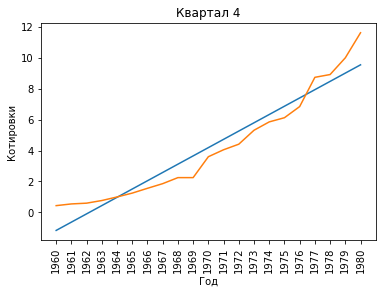

In [255]:
y_train_list = [q1['value'], 
                q2['value'], 
                q3['value'],  
                q4['value']]

x_train = np.array(q1.year).reshape(-1, 1)

for i, y_train in enumerate(y_train_list):
    model = LinearRegression()
    model.fit(x_train, y_train)    

    predicted = model.predict(x_train)
    
    plt.title(f'Квартал {i + 1}')
    plt.plot(q1.year, predicted)
    plt.plot(q1.year, y_train)
    axes = plt.gca()
    axes.set_ylabel('Котировки')
    axes.set_xlabel('Год')
    plt.xticks(rotation=90)
    plt.show()

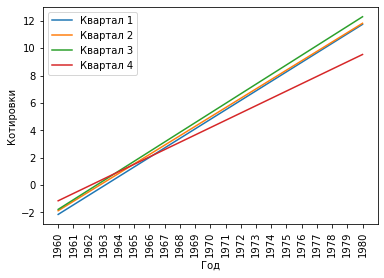

In [271]:
y_train_list = [q1['value'], 
                q2['value'], 
                q3['value'],  
                q4['value']]

x_train = np.array(q1.year).reshape(-1, 1)

for i, y_train in enumerate(y_train_list):
    model = LinearRegression()
    model.fit(x_train, y_train)    

    predicted = model.predict(x_train)
    plt.plot(q1.year, predicted, label=f'Квартал {i + 1}')

axes = plt.gca()
axes.set_ylabel('Котировки')
axes.set_xlabel('Год')
axes.legend()
plt.xticks(rotation=90)
plt.show()

#### Линейная регрессия для всех кварталов вместе

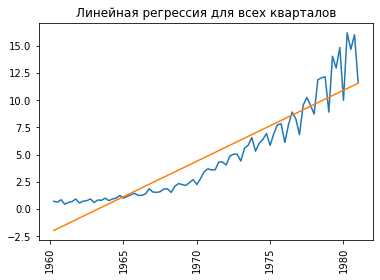

In [295]:
temp_data = data_johnson

label_encoder = LabelEncoder() 
temp_data['quarter'] = label_encoder.fit_transform(data_johnson['quarter']) 
temp_data['temp'] = temp_data['year'].astype(int) + ((temp_data['quarter'] + 1) / 4)

x_train = np.array(temp_data['temp']).reshape(-1, 1)
y_train = temp_data['value']

modelAllQuarter = LinearRegression()
modelAllQuarter.fit(x_train, y_train)

predicted = modelAllQuarter.predict(x_train)
    
plt.title('Линейная регрессия для всех кварталов')
plt.plot(temp_data['temp'], y_train)
plt.plot(temp_data['temp'], predicted)
plt.xticks(rotation=90)
plt.show()

#### Прогноз прибыли в 2016

In [297]:
x_test = [[2016]]

predicted = modelAllQuarter.predict(x_test)
print('Прибыль:', *predicted)

Прибыль: 34.393027268738706


In [294]:
y_train_list = [q1['value'], 
                q2['value'], 
                q3['value'],  
                q4['value']]

x_train = np.array(q1.year).reshape(-1, 1)

x_test = [[2016]]

for i, y_train in enumerate(y_train_list):
    model = LinearRegression()
    model.fit(x_train, y_train)    

    predicted = model.predict(x_test)
    print(f'Квартал {i + 1}   Прибыль:', *predicted)

Квартал 1   Прибыль: 36.75963636363622
Квартал 2   Прибыль: 36.48945454545469
Квартал 3   Прибыль: 37.653939393939254
Квартал 4   Прибыль: 28.79391341991345


# Задание 7

Загрузите данные из файла cars.csv. Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час.

In [343]:
data_cars = pd.read_csv('lab5_files/cars.csv')

data_cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [344]:
x_train = np.array(data_cars['speed']).reshape(-1, 1)
y_train = data_cars['dist']

model = LinearRegression()
model.fit(x_train, y_train)

x_test = [[40]]
predicted = model.predict(x_test)
print('Длина тормозного пути: ', *predicted)

Длина тормозного пути:  139.7172554744526


# Задание 8

Загрузите данные из файла svmdata6.txt. Постройте регрессионный алгоритм метода опорных векторов (sklearn.svm.SVR) с параметром C = 1, используя ядро "rbf". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат

In [313]:
data_svm = pd.read_csv('lab5_files/svmdata6.txt', sep='\t')

data_svm.describe()

,X,Y
count,101.000000,101.000000
mean,2.500000,0.136550
std,1.465009,0.723882
min,0.000000,-1.199663
25%,1.250000,-0.494140
50%,2.500000,0.306225
75%,3.750000,0.768390
max,5.000000,1.200163


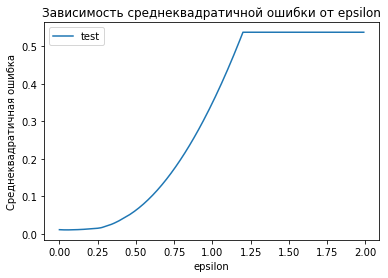

In [318]:
x_train = np.array(data_svm['X']).reshape(-1, 1)
y_train = data_svm['Y']

epsilon_list = [i / 100 for i in range(0, 200, 1)]
error = []

for epsilon in epsilon_list:
    model = SVR(C=1.0, kernel='rbf', epsilon=epsilon)
    model.fit(x_train, y_train)
    
    predicted = model.predict(x_train)
    error.append(metrics.mean_squared_error(y_train, predicted))
    
plt.plot(epsilon_list, error, label='test')
plt.title("Зависимость среднеквадратичной ошибки от epsilon")
axes = plt.gca()
axes.set_ylabel('Среднеквадратичная ошибка')
axes.set_xlabel('epsilon')
axes.legend()
plt.show()


Если epsilon больше диапазона целевых значений, мы не можем добиться хорошего результата. Если epsilon равен нулю, мы можем получить переобучение.

# Задание 9

Загрузите набор данных из файла nsw74psid1.csv. Постройте регрессионное дерево (sklearn.tree.DecisionTreeRegressor) для признака re78. Постройте линейную регрессионную модель и SVM-регрессию для этого набора данных. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор.

In [320]:
data_nsw = pd.read_csv('lab5_files/nsw74psid1.csv')

data_nsw.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000
mean,0.069159,34.225794,11.994393,0.291589,0.034393,0.819439,0.333084,18230.003096,17850.893766,20502.375641
std,0.253772,10.499842,3.053556,0.454579,0.182269,0.384726,0.471404,13722.251526,13877.777180,15632.519749
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,10.000000,0.000000,0.000000,1.000000,0.000000,8816.700600,7605.290300,9243.400900
50%,0.000000,32.000000,12.000000,0.000000,0.000000,1.000000,0.000000,17437.475000,17008.065000,19432.104000
75%,0.000000,43.500000,14.000000,1.000000,0.000000,1.000000,1.000000,25470.468000,25583.709500,28815.668000
max,1.000000,55.000000,17.000000,1.000000,1.000000,1.000000,1.000000,137148.680000,156653.230000,121173.580000


In [341]:
x_train, x_test, y_train, y_test = train_test_split(
        data_nsw.drop(['re78'], axis=1), 
        data_nsw['re78'],
        random_state=1,
        test_size=0.3)

models = [
    LinearRegression(),
    SVR(kernel='rbf', ),
    DecisionTreeRegressor()
]

for model in models:
    model.fit(x_train, y_train)
    
    predicted = model.predict(x_test)
    error_test = metrics.mean_squared_error(y_test, predicted)
    
    predicted = model.predict(x_train)
    error_train = metrics.mean_squared_error(y_train, predicted)
    
    score = model.score(x_test, y_test)
    
    print(f'Score: {score:.{3}f}  Error test: {error_test:.{3}f}  Error train: {error_train:.{3}f}', model.__class__.__name__)

Score: 0.593  Error test: 105005950.302  Error train: 100196055.585 LinearRegression
Score: 0.002  Error test: 257211421.204  Error train: 233619968.135 SVR
Score: 0.258  Error test: 191436624.113  Error train: 639318.406 DecisionTreeRegressor
